In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Загрузим данные и посмотрим на первые 20 строк

data = pd.read_csv('C:\\Games\\Datasets\\Test\\data.csv', sep = ';')
data.head(20)

,closed_cred_sum,closed_creds,active_cred_sum_overdue,active_cred_sum,active_cred_day_overdue,active_cred_max_overdue,age,gender,region,first_loan,loan_cost_all,first_days_quant,month_income,order_date,cost_all,order_id,client_id,expert
0,143822.00,22,104.12,130068.80,8,756.09,31,0,36,10000.0,10000,196,0.0,2017-07-23,0.0,728319,320464,1
1,0.00,0,38151.93,46230.00,1492,38151.93,51,0,93,10000.0,10000,17,20000.0,2017-07-23,0.0,728321,320466,1
2,51356.00,2,3000.00,3000.00,8,3000.00,28,1,3,10000.0,10000,84,0.0,2017-07-23,0.0,728323,320467,1
3,0.00,0,22784.19,32103.52,913,22784.19,28,0,52,10000.0,10000,7,0.0,2017-07-23,0.0,728447,320533,1
4,12298.00,1,4942.95,4950.00,2883,4942.95,31,0,47,5000.0,5000,20,0.0,2017-07-23,0.0,728421,298598,1
5,786916.00,11,0.00,1063763.00,0,10395.39,47,0,38,10000.0,5500,14,50000.0,2017-07-23,0.0,728526,320564,0
6,786916.00,11,0.00,1063763.00,0,10395.39,47,0,38,10000.0,5500,14,50000.0,2017-07-23,0.0,728526,320564,0
7,786916.00,11,0.00,1063763.00,0,10395.39,47,0,38,10000.0,5500,14,50000.0,2017-07-23,0.0,728526,320564,0
8,786916.00,11,0.00,1063763.00,0,10395.39,47,0,38,10000.0,5500,14,50000.0,2017-07-23,0.0,728526,320564,0
9,0.00,0,21143.00,21143.00,1016,10924.00,28,1,0,10000.0,10000,90,0.0,2017-07-23,0.0,728454,123851,1


In [3]:
# Первое, на что сразу мы можем обратить внимание - наличие дубликатов в данном наборе. Узнаем объем выборки

data.shape

(50001, 18)

In [4]:
# Избавимся от дубликатов

data.drop_duplicates(inplace = True)

In [5]:
# И убедимся в том, что объем выборки существенно сократился

data.shape

(42943, 18)

In [6]:
# Посмотрим на данные еще раз
# Невооруженным глазом можно заметить, что количественные переменные варьируются в очень широком диапазоне значений

data.head(20)

,closed_cred_sum,closed_creds,active_cred_sum_overdue,active_cred_sum,active_cred_day_overdue,active_cred_max_overdue,age,gender,region,first_loan,loan_cost_all,first_days_quant,month_income,order_date,cost_all,order_id,client_id,expert
0,143822.00,22,104.12,130068.80,8,756.09,31,0,36,10000.0,10000,196,0.0,2017-07-23,0.0,728319,320464,1
1,0.00,0,38151.93,46230.00,1492,38151.93,51,0,93,10000.0,10000,17,20000.0,2017-07-23,0.0,728321,320466,1
2,51356.00,2,3000.00,3000.00,8,3000.00,28,1,3,10000.0,10000,84,0.0,2017-07-23,0.0,728323,320467,1
3,0.00,0,22784.19,32103.52,913,22784.19,28,0,52,10000.0,10000,7,0.0,2017-07-23,0.0,728447,320533,1
4,12298.00,1,4942.95,4950.00,2883,4942.95,31,0,47,5000.0,5000,20,0.0,2017-07-23,0.0,728421,298598,1
5,786916.00,11,0.00,1063763.00,0,10395.39,47,0,38,10000.0,5500,14,50000.0,2017-07-23,0.0,728526,320564,0
9,0.00,0,21143.00,21143.00,1016,10924.00,28,1,0,10000.0,10000,90,0.0,2017-07-23,0.0,728454,123851,1
10,0.00,0,21143.00,21143.00,1016,10924.00,28,1,0,10000.0,10000,15,30000.0,2017-07-23,0.0,728553,123851,1
11,937276.13,17,11577.24,819686.00,19,11577.24,47,0,47,31000.0,20000,20,60000.0,2017-07-23,52960.0,728474,166827,0
12,0.00,0,0.00,8000.00,0,0.00,24,1,80,7000.0,7000,10,35000.0,2017-07-23,0.0,728476,320544,1


In [7]:
# Создадим список количественных переменных
# В него не включены 'age', 'loan_cost_all' и 'cost_all', с ними разберемся отдельно позже

num_columns = ['closed_cred_sum', 'closed_creds', 'active_cred_sum_overdue', 'active_cred_sum', 'active_cred_day_overdue', 
              'active_cred_max_overdue', 'first_loan', 'first_days_quant', 'month_income']

In [8]:
# Оценим значения средних и медиан для количественных переменных
# У шести переменных, характеризующих кредитную историю клиента, значения статистик сильно разнятся
# Можем сделать быстрый вывод о том, что их распределения не являются нормальными

for i in num_columns:
    print(i, '-' , round(data[i].mean(), 2), '|', round(data[i].median(), 2))

closed_cred_sum - 179966.45 | 39835.0
closed_creds - 7.84 | 3.0
active_cred_sum_overdue - 49786.39 | 5000.0
active_cred_sum - 188713.26 | 54430.82
active_cred_day_overdue - 703.1 | 61.0
active_cred_max_overdue - 36453.47 | 6431.0
first_loan - 7725.3 | 7000.0
first_days_quant - 24.16 | 20.0
month_income - 25514.71 | 26000.0


<AxesSubplot:xlabel='first_loan'>

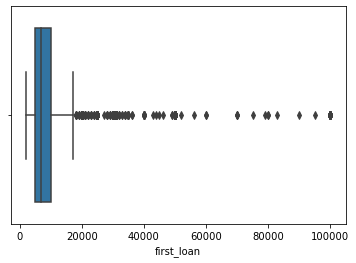

In [9]:
# Посмотрим отдельно на оставшиеся переменные из списка num_columns

sns.boxplot(data['first_loan'])

<AxesSubplot:xlabel='first_days_quant'>

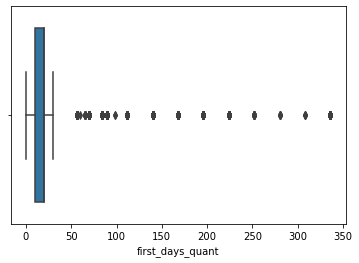

In [10]:
# Казалось бы, исходя из графиков можем наблюдать большое количество выбросов, но следуя логике нужно понимать, что они не
# являются ошибками измерений, наши переменные действительно так распределены

sns.boxplot(data['first_days_quant'])

<AxesSubplot:xlabel='month_income'>

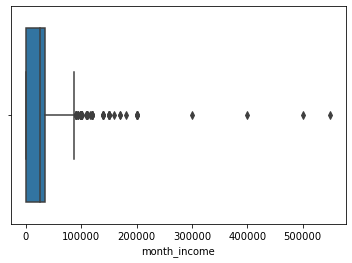

In [11]:
# Таким образом, впоследствии, к переменным из списка num_columns применим силовое преобразование, 
# а также стандартизацию, когда будем формировать конвейер

sns.boxplot(data['month_income'])

In [12]:
# В наших данных практически нет пропущенных значений,
# лишь в переменной 'first_loan' присутствует совсем малое количество пропусков

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42943 entries, 0 to 50000
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   closed_cred_sum          42943 non-null  float64
 1   closed_creds             42943 non-null  int64  
 2   active_cred_sum_overdue  42943 non-null  float64
 3   active_cred_sum          42943 non-null  float64
 4   active_cred_day_overdue  42943 non-null  int64  
 5   active_cred_max_overdue  42943 non-null  float64
 6   age                      42943 non-null  int64  
 7   gender                   42943 non-null  int64  
 8   region                   42943 non-null  int64  
 9   first_loan               42926 non-null  float64
 10  loan_cost_all            42943 non-null  int64  
 11  first_days_quant         42943 non-null  int64  
 12  month_income             42943 non-null  float64
 13  order_date               42943 non-null  object 
 14  cost_all              

<AxesSubplot:xlabel='expert', ylabel='count'>

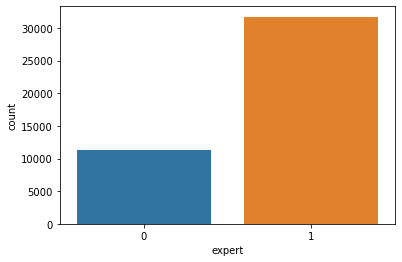

In [13]:
# Посмотрим на целевую переменную
# Имеем задачу бинарной классификации с дисбалансом классов 

sns.countplot(data['expert'])

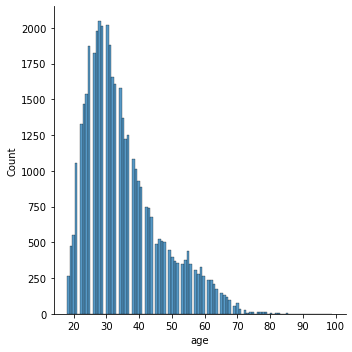

In [14]:
# К переменной возраста в конвейре применим биннинг, разбив ее на группы

sns.displot(data['age'])

<AxesSubplot:xlabel='gender', ylabel='count'>

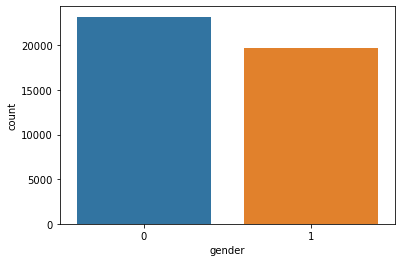

In [15]:
# Категориальную переменную пол оставляем как есть, впоследствии все категориальные переменные мы закодируем

sns.countplot(data['gender'])

In [16]:
# В переменной регион нам встречается значение "0", более того очень большое кол-во раз
# Регион равный нулю можно расценивать как пропуск, тогда мы имеем переменную с огромным кол-вом пропусков и почти сотней разных
# вариантов значений, среди которых также присутствуют еще и редкие категории
# Переменная будет слишком сложной для обработки в модели, перед разбиением на тренировочную и тестовую выборки избавимся от нее

data['region'].value_counts()

0     17605
40     3668
36     1594
75     1524
65     1320
      ...  
48       15
43       13
85       13
21        8
9         5
Name: region, Length: 99, dtype: int64

In [17]:
# Как мы помним в переменной 'first_loan' присутствует немного пропусков
# Можно заметить ее взаимосвязь с 'loan_cost_all' и увидеть, что в более, чем ~80% случаев они равны 

data.query("first_loan == loan_cost_all")['first_loan'].count()/data.shape[0]

0.8166639498870596

In [18]:
# Заполним пропуски значением "0"

data['first_loan'].fillna(0, inplace = True)

In [19]:
# Посмотрим на срез данных

data.query('first_loan == 0')

,closed_cred_sum,closed_creds,active_cred_sum_overdue,active_cred_sum,active_cred_day_overdue,active_cred_max_overdue,age,gender,region,first_loan,loan_cost_all,first_days_quant,month_income,order_date,cost_all,order_id,client_id,expert
184,2722669.00,59,0.00,891500.00,0,8956.61,57,0,40,0.0,10000,10,87000.0,2017-07-25,0.0,730831,183863,1
7150,765963.00,8,589946.45,1025000.00,4418,259317.43,53,0,40,0.0,2000,20,40000.0,2017-07-01,0.0,702433,306898,1
8848,23500.00,4,12594.87,287250.00,282,8500.00,22,0,40,0.0,2000,20,42000.0,2017-07-03,0.0,705194,214622,1
13176,24000.00,3,2230.20,3000.00,5,2230.20,22,0,0,0.0,2000,20,25000.0,2017-07-08,0.0,711678,197369,1
13461,934734.29,97,0.00,307449.02,0,764.82,25,1,0,0.0,2500,20,50000.0,2017-07-08,3590.0,712046,231691,0
13581,0.00,0,15000.00,15000.00,137,15000.00,18,0,78,0.0,2000,20,30000.0,2017-07-08,0.0,712179,227008,1
24461,1653801.90,117,255644.29,672187.99,2744,60076.09,36,1,4,0.0,2000,20,40000.0,2017-07-24,0.0,729540,236614,1
30659,5337.00,1,37124.07,38567.00,1435,37124.07,25,0,65,0.0,2000,20,25000.0,2017-07-30,0.0,738690,149577,1
31243,62709.00,7,50641.35,67496.00,3579,45027.00,36,0,78,0.0,2000,20,26000.0,2017-07-31,0.0,740962,309289,1
32363,129000.00,4,73506.93,83500.00,4801,47506.93,31,0,78,0.0,1000,23,45000.0,2017-07-31,1501.4,741054,324256,0


In [20]:
# И заполним все пропущенные значения(нули) соответствующими им значениями из переменной 'loan_cost_all'

data.loc[(data['first_loan'] == 0) & (data['loan_cost_all'] == 10000), 'first_loan'] = 10000
data.loc[(data['first_loan'] == 0) & (data['loan_cost_all'] == 2000), 'first_loan'] = 2000
data.loc[(data['first_loan'] == 0) & (data['loan_cost_all'] == 2500), 'first_loan'] = 2500
data.loc[(data['first_loan'] == 0) & (data['loan_cost_all'] == 1000), 'first_loan'] = 1000
data.loc[(data['first_loan'] == 0) & (data['loan_cost_all'] == 1500), 'first_loan'] = 1500
data.loc[(data['first_loan'] == 0) & (data['loan_cost_all'] == 3000), 'first_loan'] = 3000

In [21]:
data['first_loan'].isna().sum()

0

In [22]:
# Обратим еще раз внимание на взаимосвязь переменных 'first_loan' и 'loan_cost_all'
# Более 90% данных подчиняются правилу, что при равенстве этих двух переменных целевая 'expert' равна "1" и равна "0", 
# если переменные не равны (лик в данных, от которого мы бы избавились в случае реального прода, 
# но сейчас оставим дабы оценить качество модели "в соревновательных целях")

data.query("(first_loan == loan_cost_all) & (expert == 1)")['first_loan'].count()/data.shape[0]

0.7364646158861747

In [23]:
data.query("(first_loan != loan_cost_all) & (expert == 0)")['first_loan'].count()/data.shape[0]

0.18089094846657197

In [24]:
# Преобразуем 'loan_cost_all' в категориальную переменную по вышеописанной зависимости

data.loc[data['loan_cost_all'] == data['first_loan'], 'loan_cost_all'] = 1

In [25]:
data.loc[data['loan_cost_all'] != 1, 'loan_cost_all'] = 0

In [26]:
# Теперь она принимает значения только "1" и "0"

data['loan_cost_all'].value_counts()

1    35087
0     7856
Name: loan_cost_all, dtype: int64

In [27]:
# Рассмотрим переменную дата

data['order_date'] = pd.to_datetime(data['order_date'])

In [28]:
# Вычленим из нее год и месяц и посмотрим на графики

data['Year'] = data['order_date'].apply(lambda x: x.year)

<AxesSubplot:xlabel='Year', ylabel='count'>

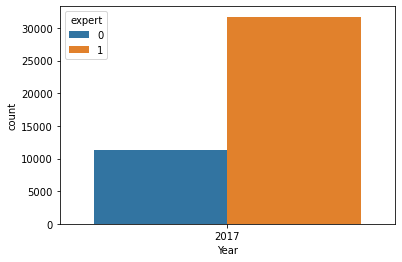

In [29]:
sns.countplot(data['Year'], hue = data['expert'])

In [30]:
data['Month'] = data['order_date'].apply(lambda x: x.month)

<AxesSubplot:xlabel='Month', ylabel='count'>

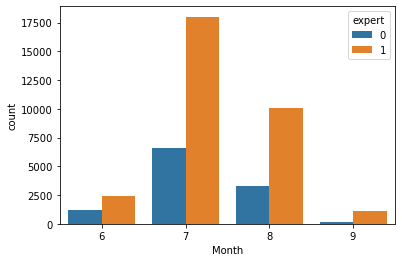

In [31]:
# Общая тенденция распределения целевой переменной сохраняется независимо от даты
# От даты можно будет избавиться перед разбиением на тренировочную и тестовую выборки

sns.countplot(data['Month'], hue = data['expert'])

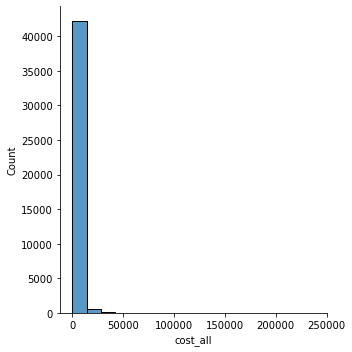

In [32]:
# Видим, что в переменной 'cost_all' подавляющее большинство значений равно нулю

sns.displot(data['cost_all'])

In [33]:
# Преобразуем ее, чтобы она принимала значения только "1" или "0"

data.loc[data['cost_all'] != 0, 'cost_all'] = 1

In [34]:
data['cost_all'].value_counts()

0.0    34548
1.0     8395
Name: cost_all, dtype: int64

In [35]:
# Подготовим датасэт для обучения, убрав из него ненужные переменные

data_pre = data.drop(['region', 'order_date', 'order_id', 'client_id', 'Year', 'Month'], axis = 1)

In [36]:
data_pre.head(20)

,closed_cred_sum,closed_creds,active_cred_sum_overdue,active_cred_sum,active_cred_day_overdue,active_cred_max_overdue,age,gender,first_loan,loan_cost_all,first_days_quant,month_income,cost_all,expert
0,143822.00,22,104.12,130068.80,8,756.09,31,0,10000.0,1,196,0.0,0.0,1
1,0.00,0,38151.93,46230.00,1492,38151.93,51,0,10000.0,1,17,20000.0,0.0,1
2,51356.00,2,3000.00,3000.00,8,3000.00,28,1,10000.0,1,84,0.0,0.0,1
3,0.00,0,22784.19,32103.52,913,22784.19,28,0,10000.0,1,7,0.0,0.0,1
4,12298.00,1,4942.95,4950.00,2883,4942.95,31,0,5000.0,1,20,0.0,0.0,1
5,786916.00,11,0.00,1063763.00,0,10395.39,47,0,10000.0,0,14,50000.0,0.0,0
9,0.00,0,21143.00,21143.00,1016,10924.00,28,1,10000.0,1,90,0.0,0.0,1
10,0.00,0,21143.00,21143.00,1016,10924.00,28,1,10000.0,1,15,30000.0,0.0,1
11,937276.13,17,11577.24,819686.00,19,11577.24,47,0,31000.0,0,20,60000.0,1.0,0
12,0.00,0,0.00,8000.00,0,0.00,24,1,7000.0,1,10,35000.0,0.0,1


In [37]:
data_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42943 entries, 0 to 50000
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   closed_cred_sum          42943 non-null  float64
 1   closed_creds             42943 non-null  int64  
 2   active_cred_sum_overdue  42943 non-null  float64
 3   active_cred_sum          42943 non-null  float64
 4   active_cred_day_overdue  42943 non-null  int64  
 5   active_cred_max_overdue  42943 non-null  float64
 6   age                      42943 non-null  int64  
 7   gender                   42943 non-null  int64  
 8   first_loan               42943 non-null  float64
 9   loan_cost_all            42943 non-null  int64  
 10  first_days_quant         42943 non-null  int64  
 11  month_income             42943 non-null  float64
 12  cost_all                 42943 non-null  float64
 13  expert                   42943 non-null  int64  
dtypes: float64(7), int64(7

<AxesSubplot:>

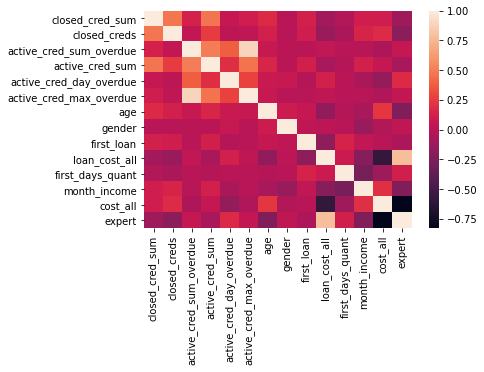

In [38]:
# Как мы и выяснили ранее большое влияние на целевую переменную оказывает 'loan_cost_all', а также 'cost_all'

sns.heatmap(data_pre.corr())

<AxesSubplot:>

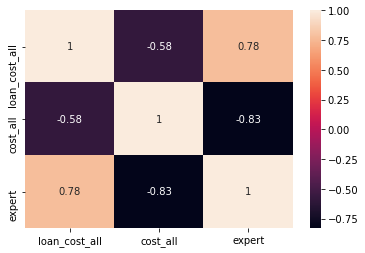

In [39]:
sns.heatmap(data_pre[['loan_cost_all','cost_all', 'expert']].corr(), annot = True)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import StandardScaler

In [41]:
# Разбиваем данные на тренировочную и тестовую выборки

X_train, X_test, y_train, y_test = train_test_split(data_pre.drop('expert', axis = 1), 
                                                    data_pre['expert'], 
                                                    random_state = 42)

In [42]:
# Создаем списки переменных

cat_columns = ['gender', 'loan_cost_all', 'cost_all']
num_columns = ['closed_cred_sum', 'closed_creds', 'active_cred_sum_overdue', 'active_cred_sum', 'active_cred_day_overdue', 
              'active_cred_max_overdue', 'first_loan', 'first_days_quant', 'month_income']
num_columns_for_bin = ['age']

In [43]:
# Создаем трансформеры для переменных
# Категориальные, как и говорилось ранее будем кодировать
# Количественные преобразуем силовым преобразованием Йео-Джонсона и стандартизируем
# Переменную возраст разобьем на группы с помощью биннинга

cat_pipe = Pipeline([('ohe', OneHotEncoder(sparse = False, handle_unknown = 'ignore'))])
num_pipe = Pipeline([('yeo-johnson', PowerTransformer('yeo-johnson')), ('std', StandardScaler())])
num_bin_pipe = Pipeline([('bin', KBinsDiscretizer())])

In [44]:
# Создаем список кортежей, в котором первый элемент кортежа - название трансформера с преобразованиями

transformers = [('num_bin', num_bin_pipe, num_columns_for_bin), ('cat', cat_pipe, cat_columns), ('num', num_pipe, num_columns)]

In [45]:
# Передаем список в ColumnTransformer

ct = ColumnTransformer(transformers = transformers)

In [46]:
# В качестве модели выберем логистическую регрессию

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [47]:
# Задаем итоговый конвейер

ml_pipe = Pipeline([('transform', ct), ('logreg', LogisticRegression(solver = 'saga'))])

In [48]:
# И сетку параметров

param_grid = {'transform__num_bin__bin__n_bins': [3, 4, 5], 
              'transform__num_bin__bin__strategy': ['uniform', 'quantile', 'kmeans'], 
              'logreg__C': [.01, .1, .5, 1, 5, 10]}

In [49]:
# Создадим экземпляр класса GridSearchCV, передав ему конвейер и сетку параметров,
# указав также кол-во блоков перекрестной проверки

gs = GridSearchCV(ml_pipe, param_grid, cv = 5, return_train_score = False)

In [50]:
# Обучим модель на тренировочных данных и посмотрим лучший найденный набор параметров 

gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('num_bin',
                                                                         Pipeline(steps=[('bin',
                                                                                          KBinsDiscretizer())]),
                                                                         ['age']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         ['gender',
                                       

In [51]:
gs.best_params_

{'logreg__C': 5,
 'transform__num_bin__bin__n_bins': 4,
 'transform__num_bin__bin__strategy': 'quantile'}

In [58]:
y_pred = gs.predict(X_test)

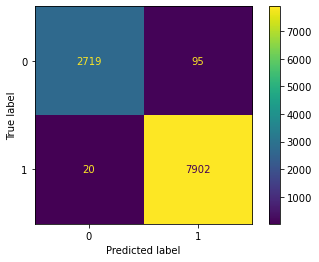

In [60]:
# Матрица ошибок на тестовых данных говорит нам об отличном результате работы модели

metrics.plot_confusion_matrix(gs, X_test, y_test)
plt.show()

In [64]:
metrics.classification_report(y_pred, y_test, output_dict = True)

{'0': {'precision': 0.9662402274342573,
  'recall': 0.9926980649872216,
  'f1-score': 0.9792904736178641,
  'support': 2739},
 '1': {'precision': 0.997475385003787,
  'recall': 0.9881205452044517,
  'f1-score': 0.9927759281361895,
  'support': 7997},
 'accuracy': 0.9892883755588674,
 'macro avg': {'precision': 0.9818578062190222,
  'recall': 0.9904093050958367,
  'f1-score': 0.9860332008770268,
  'support': 10736},
 'weighted avg': {'precision': 0.9895065794353312,
  'recall': 0.9892883755588674,
  'f1-score': 0.9893354791863298,
  'support': 10736}}

In [53]:
# Чтобы избежать ошибок 1-го рода(одобрить кредит заемщику, который его не вернет)
# и ошибок 2-го рода(отклонить кредит ответственному заемщику) нам нужно не строго классифицировать целевую переменную,
# а ранжировать вероятности классификации
# Для этого построим метрики качества, не зависящие от порога, такие как Gini и AUC-ROC

auc = metrics.roc_auc_score(y_test, gs.predict_proba(X_test)[::,1])
auc

0.996088102783231

In [54]:
fpr, tpr, _ = metrics.roc_curve(y_test, gs.predict_proba(X_test)[::,1])

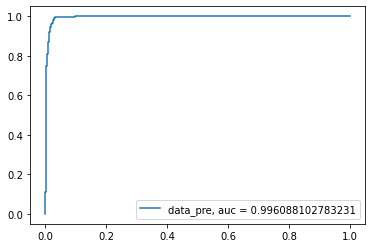

In [56]:
plt.plot(fpr, tpr, label = "data_pre, auc = "+str(auc))
plt.legend(loc=4)
plt.show()

In [57]:
Gini = 2 * auc - 1
Gini

0.992176205566462

In [65]:
print('Площадь под ROC-кривой = ', auc)
print('Коэффициент Джини = ', Gini)

Площадь под ROC-кривой =  0.996088102783231
Коэффициент Джини =  0.992176205566462
